In [1]:
import os
from cloudmesh.common.Shell import Shell
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
from tqdm.notebook import tqdm
from cloudmesh.common.util import readfile
from cloudmesh.common.util import writefile
from cloudmesh.common.StopWatch import StopWatch 
from cloudmesh.common.systeminfo import systeminfo
import ipywidgets as widgets
from collections import OrderedDict

sns.set_theme(style="whitegrid")

/home/green/ENV3/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [18]:
f_modin = llll
f_cylon ....

p = 1
for p in range(1,3):
    StopWatch.start(f"modin  {p}")
    for x in range (0,0):
        f = 
    StopWatch.stop(f"modin  {p}")

StopWatch.benchmark()



+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | hirsute                                                          |
| DISTRIB_DESCRIPTION | "Ubuntu 21.04"                                                   |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 21.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

In [2]:
data = OrderedDict()

In [3]:
i5 = [
    ("gregor", "i5", 1), 
    ("gregor", "i5", 2), 
    ("gregor", "i5", 3), 
    ("gregor", "i5", 4), 
      ("gregor", "i5", 5),
      ("gregor", "i5", 6),
      ("gregor", "i5", 7),
      ("gregor", "i5", 8),
      ("gregor", "i5", 9),
      ("gregor", "i5", 10),
      ("gregor", "i5", 11),
      ("gregor", "i5", 12)]
a =  [("gregor", "alienware", i) for i in range(1,33)] 

for user, node, processors in a:

    label = f"{user}-{node}-{processors}"
    output = f"benchmark/{user}"

    df = pd.read_pickle(f"{output}/{label}-df.pkl")
    # display(df)
    row = list(df.iloc[[-1]].values[0])
    # row = list(df.iloc[[4]].values[0])
    print (processors, row)
    data[str(processors)] = row

1 [71.995, 70.882, 71.185, 69.736, 73.209, 71.089, 72.034, 70.488, 72.165, 70.457]
2 [37.04, 36.391, 36.64, 37.114, 35.778, 36.73, 36.924, 36.78, 36.667, 36.561]
3 [24.674, 25.212, 24.712, 24.208, 24.953, 24.477, 24.574, 24.406, 24.17, 24.695]
4 [19.023, 18.779, 18.637, 18.863, 18.936, 19.162, 19.031, 18.857, 18.99, 18.881]
5 [14.734, 14.95, 14.735, 15.042, 15.055, 15.038, 15.034, 14.853, 15.229, 14.853]
6 [12.437, 12.392, 12.744, 12.527, 12.726, 12.567, 12.518, 12.253, 12.769, 12.716]
7 [10.707, 10.746, 10.881, 11.135, 10.964, 10.845, 10.688, 10.761, 10.842, 10.865]
8 [9.452, 9.564, 9.554, 9.541, 9.819, 9.541, 9.593, 9.579, 9.747, 9.724]
9 [8.53, 8.835, 8.392, 8.627, 8.771, 8.605, 8.291, 8.522, 8.626, 8.413]
10 [7.631, 7.66, 7.636, 7.726, 7.849, 7.535, 7.778, 7.806, 7.769, 7.633]
11 [6.915, 7.138, 6.989, 6.866, 7.166, 7.008, 7.156, 6.964, 7.019, 7.057]
12 [6.666, 6.486, 6.577, 6.575, 6.612, 6.589, 6.567, 6.464, 6.481, 6.468]
13 [5.98, 5.873, 5.915, 5.955, 6.037, 6.067, 5.89, 5.977, 5.

In [4]:
result = pd.DataFrame(data)
result.index.name = "Trial"
result

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Trial,,,,,,,,,,,,,,,,,,,,,
0,71.995,37.040,24.674,19.023,14.734,12.437,10.707,9.452,8.530,7.631,...,5.610,5.325,5.069,4.914,4.823,4.721,4.466,4.426,4.247,4.484
1,70.882,36.391,25.212,18.779,14.950,12.392,10.746,9.564,8.835,7.660,...,5.655,5.315,5.093,5.256,4.833,4.594,4.504,4.353,4.260,4.838
2,71.185,36.640,24.712,18.637,14.735,12.744,10.881,9.554,8.392,7.636,...,5.503,5.337,5.116,4.968,4.747,4.591,4.454,4.347,4.261,4.552
3,69.736,37.114,24.208,18.863,15.042,12.527,11.135,9.541,8.627,7.726,...,5.532,5.295,5.167,4.935,4.822,4.597,6.423,4.343,4.230,4.445
4,73.209,35.778,24.953,18.936,15.055,12.726,10.964,9.819,8.771,7.849,...,5.537,5.698,5.319,4.942,4.855,4.696,4.488,4.367,4.246,4.662
5,71.089,36.730,24.477,19.162,15.038,12.567,10.845,9.541,8.605,7.535,...,5.583,5.316,5.098,4.957,4.817,4.724,4.620,4.414,4.240,4.326
6,72.034,36.924,24.574,19.031,15.034,12.518,10.688,9.593,8.291,7.778,...,5.582,5.402,5.110,4.919,5.020,4.622,4.537,4.593,4.222,4.193
7,70.488,36.780,24.406,18.857,14.853,12.253,10.761,9.579,8.522,7.806,...,5.623,5.367,5.181,4.935,4.779,4.609,4.509,4.481,4.199,4.197
8,72.165,36.667,24.170,18.990,15.229,12.769,10.842,9.747,8.626,7.769,...,5.448,5.313,5.153,5.028,4.859,4.631,4.521,4.511,4.281,4.439


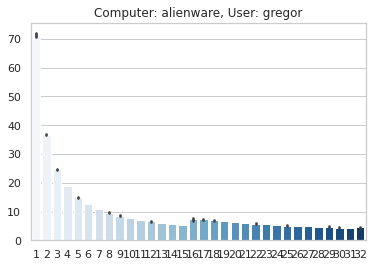

In [5]:
#sns.boxplot(data=result);
#sns.swarmplot(data=result);
sns.barplot(data=result, palette="Blues").set_title(f'Computer: {node}, User: {user}');



In [6]:
result.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,71.324000,36.662500,24.608100,18.915900,14.952300,12.564900,10.843400,9.611400,8.561200,7.702300,...,5.554100,5.380600,5.141400,5.007800,4.847800,4.644400,4.705600,4.417300,4.240500,4.47410
std,1.025079,0.380056,0.319296,0.147268,0.157683,0.173107,0.133538,0.113732,0.168503,0.098362,...,0.068092,0.120206,0.071581,0.126724,0.076614,0.052337,0.605172,0.086416,0.023922,0.20299
min,69.736000,35.778000,24.170000,18.637000,14.734000,12.253000,10.688000,9.452000,8.291000,7.535000,...,5.448000,5.295000,5.069000,4.914000,4.747000,4.591000,4.454000,4.338000,4.199000,4.19300
25%,70.586500,36.580750,24.423750,18.858500,14.853000,12.457250,10.749750,9.544250,8.440250,7.633750,...,5.510250,5.315250,5.100500,4.935000,4.818250,4.600000,4.492000,4.348500,4.224000,4.35425
50%,71.137000,36.698500,24.624000,18.908500,14.992000,12.547000,10.843500,9.571500,8.567500,7.693000,...,5.559500,5.331000,5.113000,4.949500,4.828000,4.626500,4.515000,4.390500,4.243000,4.46450
75%,72.024250,36.888000,24.707750,19.014750,15.041000,12.723500,10.877000,9.691250,8.626750,7.775750,...,5.603250,5.393250,5.163500,5.013000,4.858000,4.686750,4.536250,4.467250,4.256750,4.59175
max,73.209000,37.114000,25.212000,19.162000,15.229000,12.769000,11.135000,9.819000,8.835000,7.849000,...,5.655000,5.698000,5.319000,5.256000,5.020000,4.724000,6.423000,4.593000,4.281000,4.83800


In [7]:
df_line = pd.DataFrame({
    "Processors": list(result.columns),
    "Time in s": list(result.describe(include='all').loc['mean'])           
                 })
df_line["Processors"] = pd.to_numeric(df_line["Processors"])


In [8]:
df_line["Sum"] = df_line["Time in s"] * df_line["Processors"]
df_line

,Processors,Time in s,Sum
0,1,71.3240,71.3240
1,2,36.6625,73.3250
2,3,24.6081,73.8243
3,4,18.9159,75.6636
4,5,14.9523,74.7615
5,6,12.5649,75.3894
6,7,10.8434,75.9038
7,8,9.6114,76.8912
8,9,8.5612,77.0508
9,10,7.7023,77.0230


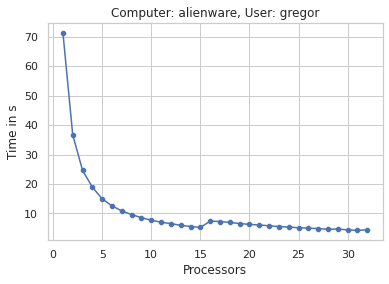

In [9]:
sns.scatterplot(data=df_line, x="Processors", y="Time in s");
sns.lineplot(data=df_line, x="Processors", y="Time in s").set_title(f'Computer: {node}, User: {user}');

In [10]:
df_line.describe()

,Processors,Time in s,Sum
count,32.000000,32.000000,32.000000
mean,16.500000,10.652975,104.212000
std,9.380832,12.975126,27.153174
min,1.000000,4.240500,71.324000
25%,8.750000,5.231775,76.990050
50%,16.500000,6.416300,120.900050
75%,24.250000,8.823750,128.684850
max,32.000000,71.324000,143.171200
